# 🧠 Marketing Campaign Segmentation and Response Prediction

### Author: Niharika Neelam  
**Objective**: Use clustering and predictive modelling to segment customers and predict marketing campaign response, using principles from the 4Ps of Marketing (Product, Price, Place, Promotion).

### Key Outcomes:
- Identified 4 customer clusters based on spending behaviour and demographics
- Predicted campaign response using Logistic Regression and Lasso Regression
- Mapped variables to marketing dimensions:  
  - **Product**: Spending on wines, meats, sweets, etc.  
  - **Place**: Web/catalog/store purchases  
  - **Promotion**: Discounts, campaign responses  
  - **People**: Income, marital status, children, education


Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data

Content:

People

    ID: Customer's unique identifier
    Year_Birth: Customer's birth year
    Education: Customer's education level
    Marital_Status: Customer's marital status
    Income: Customer's yearly household income
    Kidhome: Number of children in customer's household
    Teenhome: Number of teenagers in customer's household
    Dt_Customer: Date of customer's enrollment with the company
    Recency: Number of days since customer's last purchase
    Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products

    MntWines: Amount spent on wine in last 2 years
    MntFruits: Amount spent on fruits in last 2 years
    MntMeatProducts: Amount spent on meat in last 2 years
    MntFishProducts: Amount spent on fish in last 2 years
    MntSweetProducts: Amount spent on sweets in last 2 years
    MntGoldProds: Amount spent on gold tier products in last 2 years

Promotion

    NumDealsPurchases: Number of purchases made with a discount
    AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

    NumWebPurchases: Number of purchases made through the company’s website
    NumCatalogPurchases: Number of purchases made using a catalogue
    NumStorePurchases: Number of purchases made directly in stores
    NumWebVisitsMonth: Number of visits to company’s website in the last month


In [6]:
%matplotlib inline
!pip install dmba
from pathlib import Path

import pandas as pd
from sklearn.preprocessing import StandardScaler
from dmba import regressionSummary, classificationSummary, liftChart, gainsChart
from sklearn import preprocessing
from sklearn.metrics import pairwise
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
import numpy as np

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import preprocessing  

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    confusion_matrix, roc_curve, roc_auc_score, accuracy_score,
    precision_score, recall_score, f1_score, auc
)
import matplotlib.pyplot as plt
import numpy as np

In [28]:
customer_df = pd.read_csv('marketing_campaign.csv', sep='\t')
# Drop 'ID' column if it exists

#customer_df = pd.read_csv('excel1.csv')
customer_df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [30]:
print(len(customer_df))

2240


In [32]:
customer_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [34]:
customer_df = customer_df.drop(columns=['Z_CostContact', 'Z_Revenue'])
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [36]:
customer_df['TotalAcceptedCmp'] = customer_df['AcceptedCmp1'] + customer_df['AcceptedCmp2'] + customer_df['AcceptedCmp3'] + customer_df['AcceptedCmp4'] + customer_df['AcceptedCmp5']

customer_df['TotalNumPurchases'] = customer_df['NumWebPurchases'] + customer_df['NumCatalogPurchases'] + customer_df['NumStorePurchases'] + customer_df['NumDealsPurchases']

In [38]:
#drop rows missing income values
customer_df = customer_df.dropna()
print(customer_df.columns)
print(len(customer_df))

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'TotalAcceptedCmp',
       'TotalNumPurchases'],
      dtype='object')
2216


In [40]:
customer_df['Total_Spent'] = (
    customer_df['MntWines'] +
    customer_df['MntFruits'] +
    customer_df['MntMeatProducts'] +
    customer_df['MntFishProducts'] +
    customer_df['MntSweetProducts'])

In [42]:
# Create a binary variable "higher_education"
customer_df['Higher_Ed'] = customer_df['Education'].apply(
    lambda x: 1 if x in ['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'] else 0
)

# Display the distribution of the new binary variable
print(customer_df['Higher_Ed'].value_counts())

Higher_Ed
1    2216
Name: count, dtype: int64


In [44]:
customer_df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [46]:
# Create a binary variable "in_relationship"
customer_df['In_Relationship'] = customer_df['Marital_Status'].apply(
    lambda x: 1 if x in ['Married', 'Together'] else 0
)

# Display the distribution of the new binary variable
print(customer_df['In_Relationship'].value_counts())

In_Relationship
1    1430
0     786
Name: count, dtype: int64


In [48]:
# Convert Dt_Customer to datetime format
customer_df['Dt_Customer'] = pd.to_datetime(customer_df['Dt_Customer'], dayfirst=True)

# Calculate the most recent date
most_recent_date = customer_df['Dt_Customer'].max()

# Calculate Days Enrolled
customer_df['Days_Enrolled'] = (most_recent_date - customer_df['Dt_Customer']).dt.days

# Verify the output
print(customer_df[['Dt_Customer', 'Days_Enrolled']].head())


  Dt_Customer  Days_Enrolled
0  2012-09-04            663
1  2014-03-08            113
2  2013-08-21            312
3  2014-02-10            139
4  2014-01-19            161


In [50]:
# Calculate the maximum year from the most recent enrollment date
max_year = customer_df['Dt_Customer'].max().year

# Create an Age column based on Year_Birth
customer_df['Age'] = max_year - customer_df['Year_Birth']

# Display the first few rows to verify the new Age column
print(customer_df[['Year_Birth', 'Age']].head())

   Year_Birth  Age
0        1957   57
1        1954   60
2        1965   49
3        1984   30
4        1981   33


In [52]:
customer_df = customer_df.drop(columns=['Education', 'Marital_Status', 'Dt_Customer','Year_Birth', ])

In [54]:
# Create a binary Children column based on Kidhome and Teenhome
customer_df['Children'] = customer_df.apply(
    lambda row: 1 if row['Kidhome'] > 0 or row['Teenhome'] > 0 else 0, axis=1
)

# Display the distribution of the new binary Children column
print(customer_df['Children'].value_counts())

Children
1    1583
0     633
Name: count, dtype: int64


In [56]:
customer_df = customer_df.drop(columns=['Kidhome','Teenhome'])

In [58]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Income               2216 non-null   float64
 2   Recency              2216 non-null   int64  
 3   MntWines             2216 non-null   int64  
 4   MntFruits            2216 non-null   int64  
 5   MntMeatProducts      2216 non-null   int64  
 6   MntFishProducts      2216 non-null   int64  
 7   MntSweetProducts     2216 non-null   int64  
 8   MntGoldProds         2216 non-null   int64  
 9   NumDealsPurchases    2216 non-null   int64  
 10  NumWebPurchases      2216 non-null   int64  
 11  NumCatalogPurchases  2216 non-null   int64  
 12  NumStorePurchases    2216 non-null   int64  
 13  NumWebVisitsMonth    2216 non-null   int64  
 14  AcceptedCmp3         2216 non-null   int64  
 15  AcceptedCmp4         2216 non-null   int64 

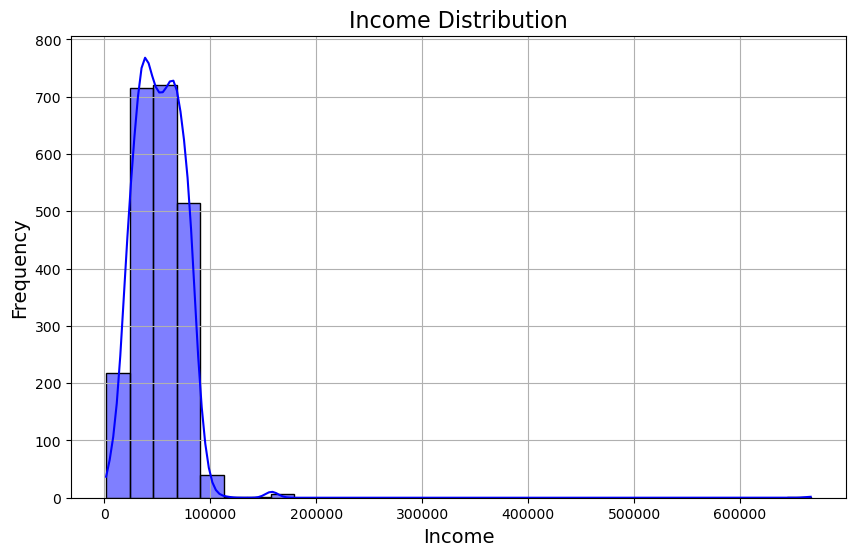

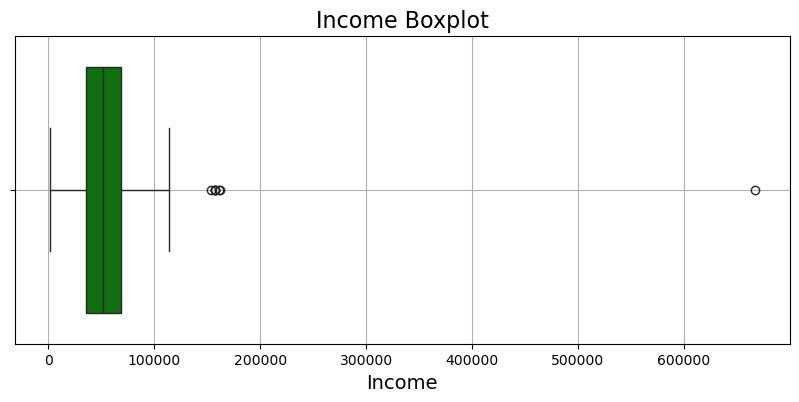

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Income distribution as a histogram
plt.figure(figsize=(10, 6))
sns.histplot(customer_df['Income'], bins=30, kde=True, color='blue')
plt.title('Income Distribution', fontsize=16)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

# Plotting Income distribution as a boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(x=customer_df['Income'], color='green')
plt.title('Income Boxplot', fontsize=16)
plt.xlabel('Income', fontsize=14)
plt.grid(True)
plt.show()


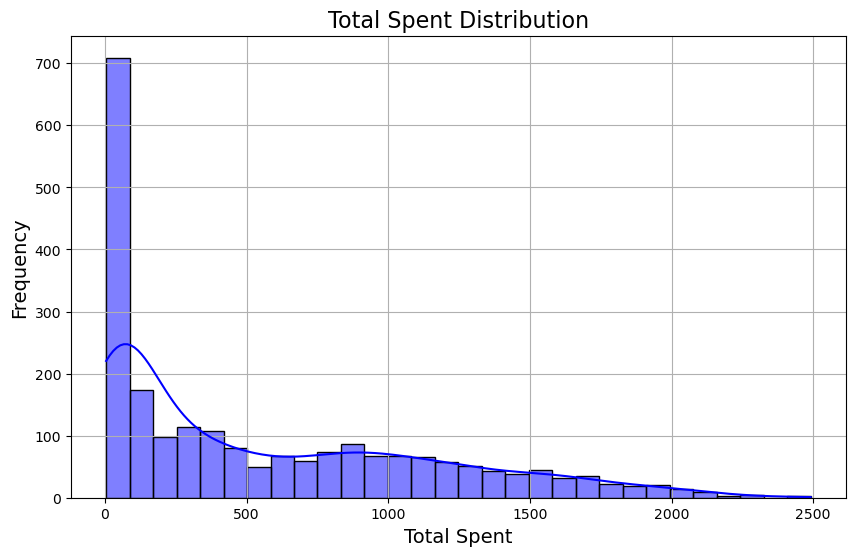

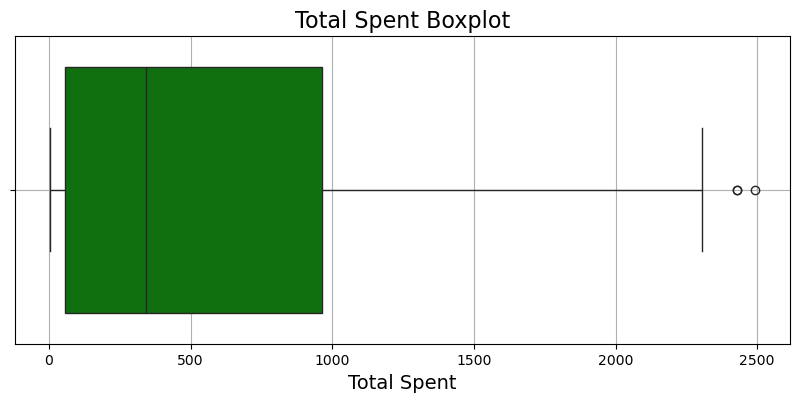

In [64]:
# Plotting Total spent as a histogram
plt.figure(figsize=(10, 6))
sns.histplot(customer_df['Total_Spent'], bins=30, kde=True, color='blue')
plt.title('Total Spent Distribution', fontsize=16)
plt.xlabel('Total Spent', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

# Plotting Income distribution as a boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(x=customer_df['Total_Spent'], color='green')
plt.title('Total Spent Boxplot', fontsize=16)
plt.xlabel('Total Spent', fontsize=14)
plt.grid(True)
plt.show()

In [66]:
# Define a function to calculate and print IQR bounds for a given column
def print_outlier_bounds(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = max(0, Q1 - 1.5 * IQR)  # Cap lower bound at 0
    upper_bound = Q3 + 1.5 * IQR
    print(f"For column '{column}':")
    print(f"  Lower Bound: {lower_bound}")
    print(f"  Upper Bound: {upper_bound}\n")

# Apply the function to Income and Total_Spent
print_outlier_bounds(customer_df, 'Income')
print_outlier_bounds(customer_df, 'Total_Spent')

For column 'Income':
  Lower Bound: 0
  Upper Bound: 118350.5

For column 'Total_Spent':
  Lower Bound: 0
  Upper Bound: 2327.5



In [68]:
# Define a function to calculate bounds and remove outliers for a given column
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = max(0, Q1 - 1.5 * IQR)  # Cap lower bound at 0
    upper_bound = Q3 + 1.5 * IQR
    # Filter rows within bounds
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to Income and Total_Spent columns
customer_df = remove_outliers(customer_df, 'Income')
customer_df = remove_outliers(customer_df, 'Total_Spent')

# Display the shape of the cleaned dataframe
print(f"Cleaned dataframe shape: {customer_df.shape}")

Cleaned dataframe shape: (2205, 29)


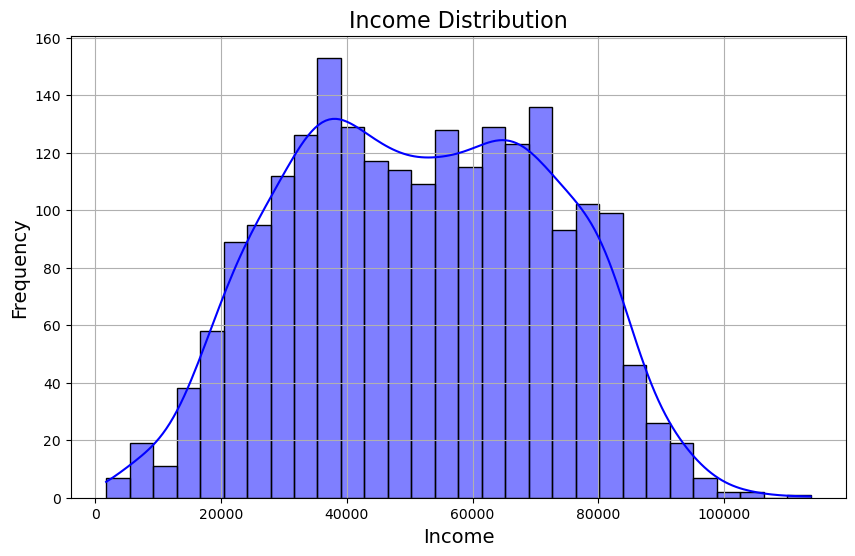

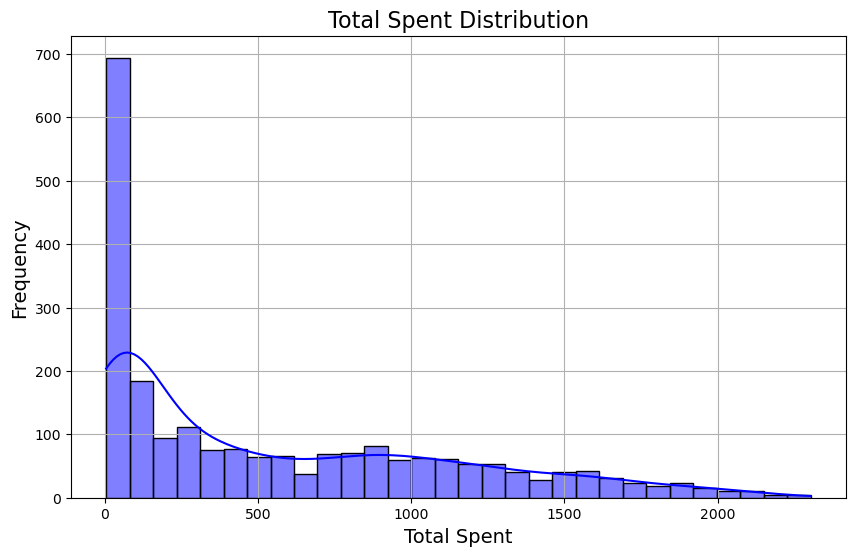

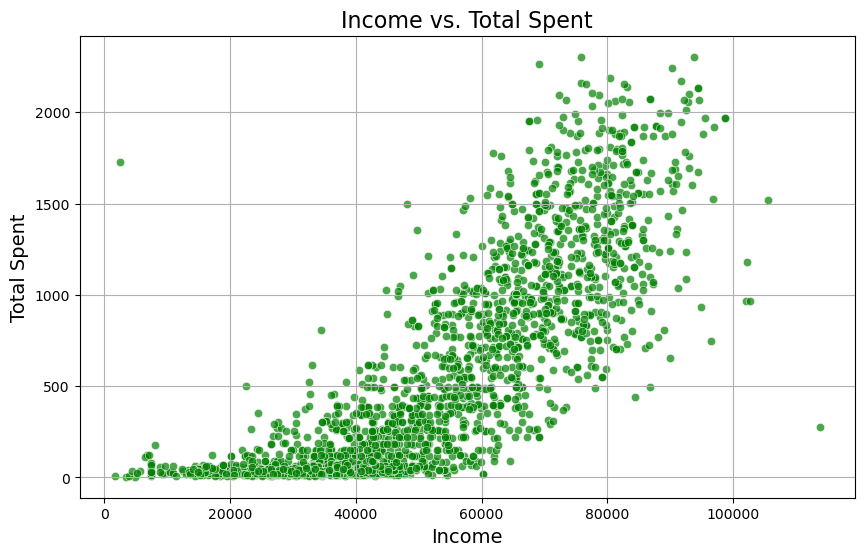

In [70]:
# Plotting Income distribution as a histogram
plt.figure(figsize=(10, 6))
sns.histplot(customer_df['Income'], bins=30, kde=True, color='blue')
plt.title('Income Distribution', fontsize=16)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

# Plotting Income distribution as a histogram
plt.figure(figsize=(10, 6))
sns.histplot(customer_df['Total_Spent'], bins=30, kde=True, color='blue')
plt.title('Total Spent Distribution', fontsize=16)
plt.xlabel('Total Spent', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

# Plot Income vs. Total Spent
plt.figure(figsize=(10, 6))
sns.scatterplot(x=customer_df['Income'], y=customer_df['Total_Spent'], alpha=0.7, color='green')
plt.title('Income vs. Total Spent', fontsize=16)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Total Spent', fontsize=14)
plt.grid(True)
plt.show()

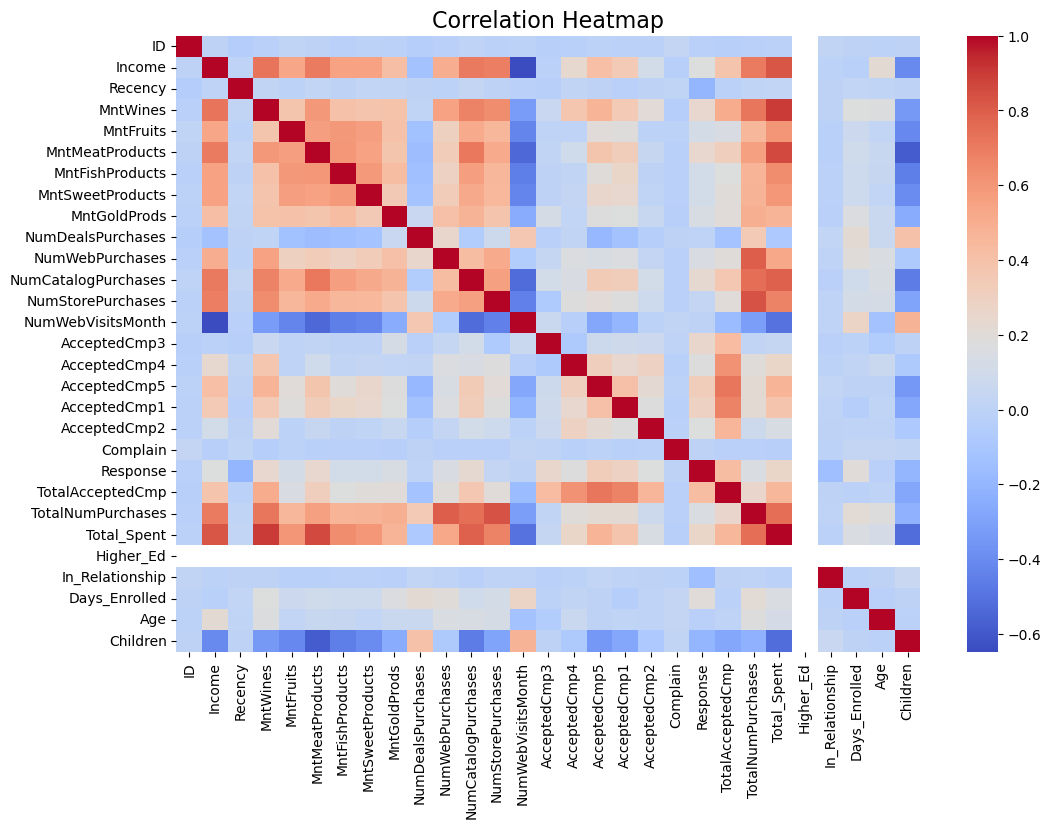

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix for numerical columns
correlation_matrix = customer_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot= False, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [74]:
# Generate a full correlation table sorted by absolute correlation values
correlation_table = correlations.copy()
correlation_table['Absolute_Correlation'] = correlation_table['Correlation'].abs()
sorted_correlation_table = correlation_table.sort_values(by='Absolute_Correlation', ascending=False)

# Display the full sorted correlation table
sorted_correlation_table.reset_index(drop=True).iloc[::2].head(20
                                                            )  # Show top 10 correlations


NameError: name 'correlations' is not defined

In [ ]:
# Start from the correlation matrix
correlation_table = customer_df.corr()

# Flatten the matrix and calculate absolute correlations
correlation_table = correlation_table.abs().unstack().reset_index()
correlation_table.columns = ['Feature_1', 'Feature_2', 'Absolute_Correlation']

# Remove self-correlations
correlation_table = correlation_table[correlation_table['Feature_1'] != correlation_table['Feature_2']]

# Drop duplicates where Feature_1 and Feature_2 are flipped
correlation_table['Pairs'] = correlation_table.apply(lambda row: tuple(sorted([row['Feature_1'], row['Feature_2']])), axis=1)
correlation_table = correlation_table.drop_duplicates(subset='Pairs')

# Sort and show
sorted_correlation_table = correlation_table.sort_values(by='Absolute_Correlation', ascending=False)
sorted_correlation_table[['Feature_1', 'Feature_2', 'Absolute_Correlation']].head(20)


KMEANS PRODUCTS

In [78]:
# Include relevant columns for clustering
products_data = customer_df[[
    "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts",
    "MntSweetProducts", "MntGoldProds", "Total_Spent", "Children",
    "In_Relationship", "Higher_Ed", "Income"
]]

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

products_data = products_data.fillna(0)
products_scaled = scaler.fit_transform(products_data)


C:\Users\neela\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\neela\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\neela\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\neela\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\neela\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

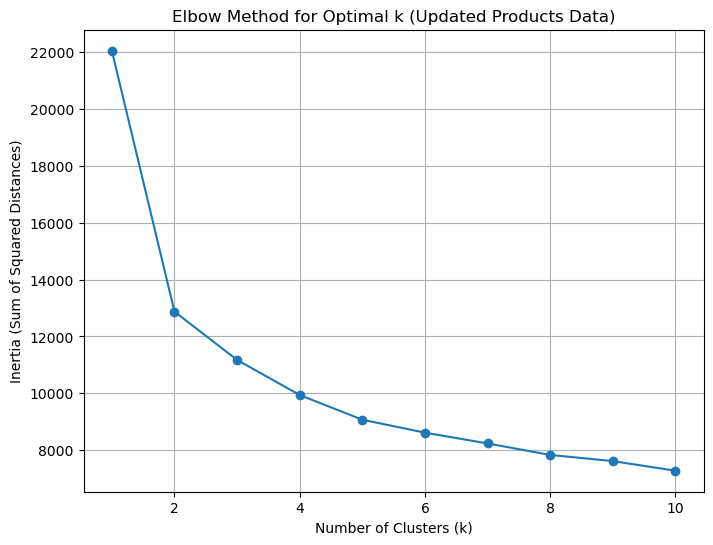

In [80]:
# Determine the optimal number of clusters using Elbow Method for updated data
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(products_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method for Optimal k (Updated Products Data)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.grid(True)
plt.show()


In [81]:
# Use k = 4 as the optimal number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)
products_clusters = kmeans.fit_predict(products_scaled)

# Add cluster labels to the dataframe
customer_df["Cluster"] = products_clusters

# Summarize clusters
cluster_summary = customer_df.groupby("Cluster")[["MntWines", "MntFruits", "MntMeatProducts",
                                                  "MntFishProducts", "MntSweetProducts", 
                                                  "MntGoldProds", "Total_Spent", "Children", 
                                                  "In_Relationship", "Higher_Ed", "Income"]].mean()

# Display cluster counts and summary stats
cluster_counts = customer_df["Cluster"].value_counts()

(cluster_counts, cluster_summary)


C:\Users\neela\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


(Cluster
 3    833
 2    475
 0    467
 1    430
 Name: count, dtype: int64,
            MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
 Cluster                                                            
 0         99.312634   7.323340        38.561028        10.096360   
 1        603.041860  79.416279       504.181395       114.141860   
 2        614.618947  31.875789       208.347368        45.113684   
 3         89.638655   6.298920        34.420168         9.436975   
 
          MntSweetProducts  MntGoldProds  Total_Spent  Children  \
 Cluster                                                          
 0                7.044968     22.665953   162.338330  0.880086   
 1               79.709302     80.941860  1380.490698  0.148837   
 2               34.997895     73.915789   934.953684  0.757895   
 3                6.315726     20.014406   146.110444  0.893157   
 
          In_Relationship  Higher_Ed        Income  
 Cluster                                          

Cluster 0 (Low Spenders):

Customers have the lowest spending across all product categories, with average income ~$37.5K and a higher children count.
Recommendation: Introduce budget-friendly promotions and discounts to encourage engagement.
Cluster 1 (Moderate Spenders):

Moderate spenders focused on wines and meat products, with an average income of ~$63.9K and fewer children.
Recommendation: Design bundled discounts and family-oriented promotions for premium food items.
Cluster 2 (Top Spenders):

High-value customers with significant spending on wines, meat products, and gold products, and a high income (~$76.2K).
Recommendation: Implement personalized loyalty programs, exclusive offers, and high-value product campaigns.
Cluster 3 (Minimal Engagement):

Customers exhibit very low spending despite 100% higher education, with lower income (~$20.3K) and moderate children count.
Recommendation: Offer educational discounts, entry-level promotions, and long-term nurturing strategies.

Visualizations

C:\Users\neela\AppData\Local\Temp\ipykernel_81048\978141041.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Cluster", y="Total_Spent", data=customer_df, palette="coolwarm")


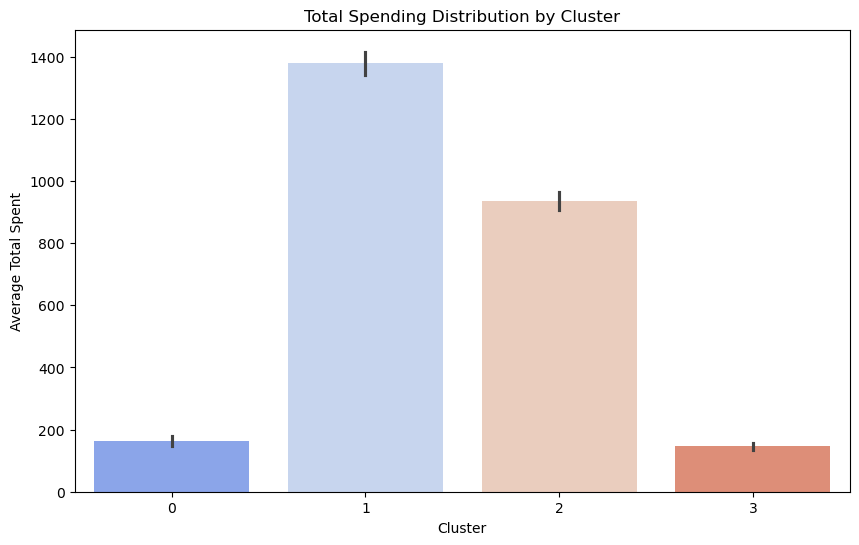

In [86]:
# Visualization 1: Spending Distribution by Cluster
plt.figure(figsize=(10, 6))
sns.barplot(x="Cluster", y="Total_Spent", data=customer_df, palette="coolwarm")
plt.title("Total Spending Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Total Spent")
plt.show()

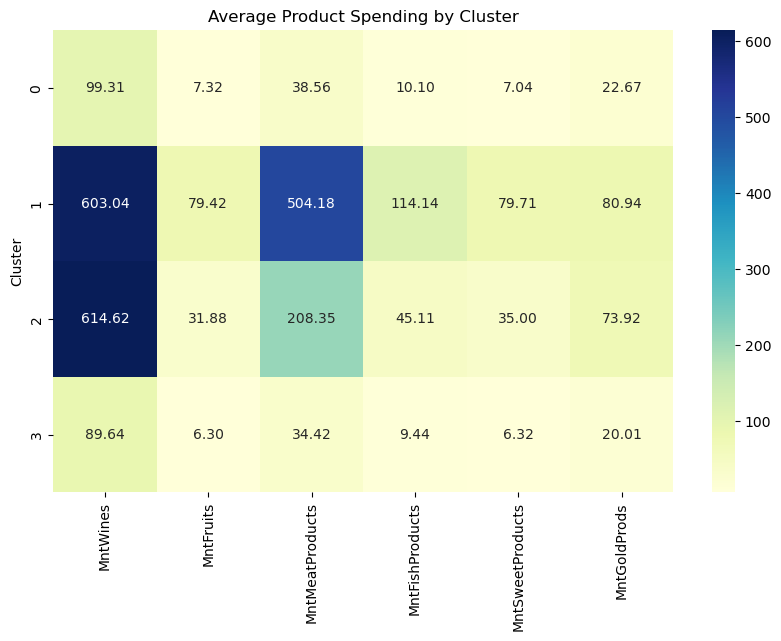

C:\Users\neela\AppData\Local\Temp\ipykernel_81048\3386128578.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Cluster", y="Income", data=customer_df, palette="coolwarm", ci=None)
C:\Users\neela\AppData\Local\Temp\ipykernel_81048\3386128578.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Cluster", y="Income", data=customer_df, palette="coolwarm", ci=None)


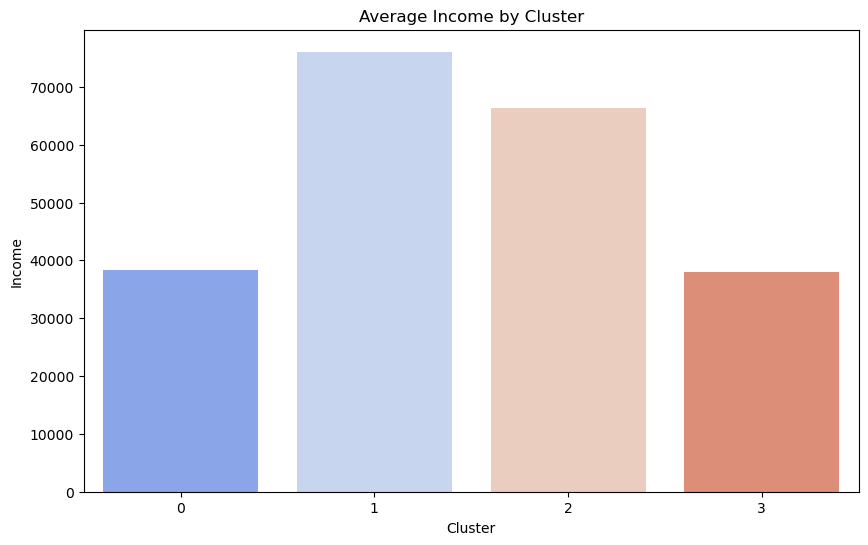

In [87]:
# Visualization 2: Product-wise Spending Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", 
                             "MntSweetProducts", "MntGoldProds"]], annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Average Product Spending by Cluster")
plt.show()

# Visualization 3: Income by Cluster
plt.figure(figsize=(10, 6))
sns.barplot(x="Cluster", y="Income", data=customer_df, palette="coolwarm", ci=None)
plt.title("Average Income by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Income")
plt.show()


In [90]:
from pandas.plotting import parallel_coordinates
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import pandas as pd

# Centroids of the clusters
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=products_data.columns)
pd.options.display.float_format = '{:.3f}'.format  # Fix float precision formatting
print("Cluster Centroids:")
print(centroids)

Cluster Centroids:
   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0    -0.612     -0.478           -0.582           -0.503            -0.487   
1     0.887      1.340            1.571            1.395             1.290   
2     0.922      0.141            0.203            0.136             0.196   
3    -0.640     -0.504           -0.601           -0.515            -0.505   

   MntGoldProds  Total_Spent  Children  In_Relationship  Higher_Ed  Income  
0        -0.413       -0.695     0.364           -1.348      0.000  -0.639  
1         0.711        1.433    -1.258           -0.108      0.000   1.185  
2         0.576        0.655     0.093            0.122      0.000   0.711  
3        -0.464       -0.724     0.393            0.742      0.000  -0.659  


In [92]:
# Compute Within-Cluster Sum of Squares (WCSS) and cluster counts
withinClusterSS = [0] * kmeans.n_clusters
clusterCount = [0] * kmeans.n_clusters

for cluster, distance in zip(kmeans.labels_, kmeans.transform(products_scaled)):
    withinClusterSS[cluster] += distance[cluster] ** 2
    clusterCount[cluster] += 1

print("\nPer-Cluster WCSS Summary:")
for cluster, withClustSS in enumerate(withinClusterSS):
    print(f'Cluster {cluster} ({clusterCount[cluster]} members): {withClustSS:.2f} within-cluster SS')


Per-Cluster WCSS Summary:
Cluster 0 (467 members): 882.33 within-cluster SS
Cluster 1 (430 members): 4573.02 within-cluster SS
Cluster 2 (475 members): 3176.72 within-cluster SS
Cluster 3 (833 members): 1305.30 within-cluster SS


In [94]:
# Combine distances with cluster labels
distances = kmeans.transform(products_scaled)
minSquaredDistances = distances.min(axis=1) ** 2

distance_df = pd.DataFrame({'squaredDistance': minSquaredDistances, 'cluster': kmeans.labels_},
                           index=customer_df.index)

# Group by clusters
print("\nCluster-Wise Distance Summary:")
for cluster, data in distance_df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within-cluster SS')
    


Cluster-Wise Distance Summary:
Cluster 0 (467 members): 882.33 within-cluster SS
Cluster 1 (430 members): 4573.02 within-cluster SS
Cluster 2 (475 members): 3176.72 within-cluster SS
Cluster 3 (833 members): 1305.30 within-cluster SS


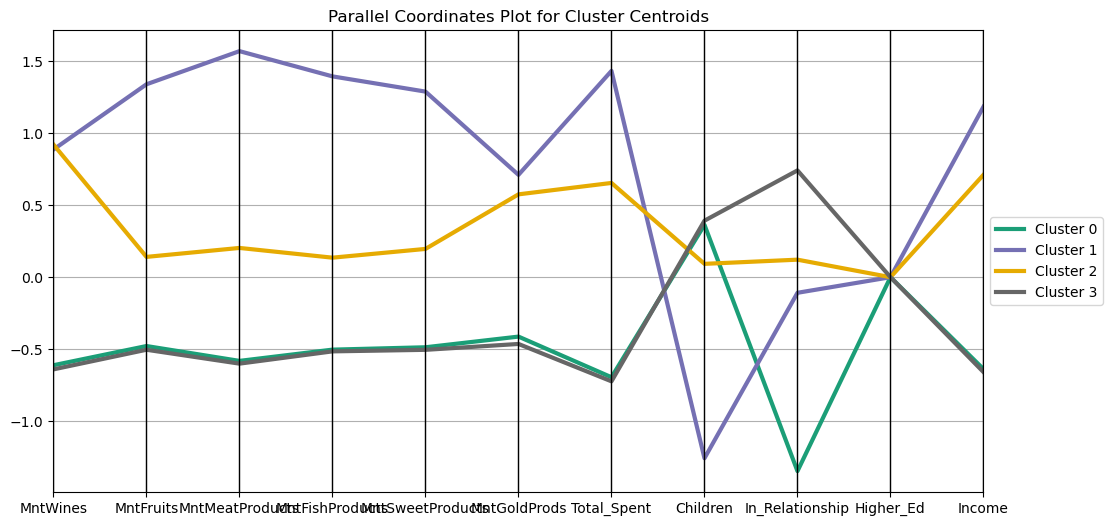

In [96]:
# Parallel Coordinates Plot for Centroids
centroids['Cluster'] = [f'Cluster {i}' for i in centroids.index]

plt.figure(figsize=(12, 6))
parallel_coordinates(centroids, class_column='Cluster', colormap='Dark2', linewidth=3)
plt.title("Parallel Coordinates Plot for Cluster Centroids")
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [98]:
# Pairwise Euclidean distances between cluster centroids
pairwise_dist = pd.DataFrame(pairwise_distances(kmeans.cluster_centers_, metric='euclidean'))
print("\nPairwise Distances Between Cluster Centroids:")
print(pairwise_dist)

# Sum of pairwise distances for each cluster center
centroid_dist_sums = pairwise_dist.sum(axis=0)
print("\nSum of Pairwise Distances for Each Cluster Center:")
print(centroid_dist_sums)


Pairwise Distances Between Cluster Centroids:
      0     1     2     3
0 0.000 5.498 3.329 2.091
1 5.498 0.000 2.969 5.496
2 3.329 2.969 0.000 3.123
3 2.091 5.496 3.123 0.000

Sum of Pairwise Distances for Each Cluster Center:
0   10.918
1   13.963
2    9.421
3   10.710
dtype: float64


In [100]:
customer_df.columns


Index(['ID', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'TotalAcceptedCmp', 'TotalNumPurchases',
       'Total_Spent', 'Higher_Ed', 'In_Relationship', 'Days_Enrolled', 'Age',
       'Children', 'Cluster'],
      dtype='object')

PROMOTIONS

In [103]:
promotion_features = customer_df[[
    'Income', 'Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
    'AcceptedCmp4', 'AcceptedCmp5', 'Higher_Ed', 'In_Relationship', 'Total_Spent', 'Children', 'Age', 'Days_Enrolled'
]].copy()

# Impute missing 'Income' values with the median
promotion_features['Income'] = promotion_features['Income'].fillna(promotion_features['Income'].median())

# Target variable
target = customer_df['Response']

# Check the DataFrame for confirmation
promotion_features.isnull().sum()
promotion_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2239
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2205 non-null   float64
 1   Recency              2205 non-null   int64  
 2   NumDealsPurchases    2205 non-null   int64  
 3   NumWebPurchases      2205 non-null   int64  
 4   NumCatalogPurchases  2205 non-null   int64  
 5   NumStorePurchases    2205 non-null   int64  
 6   NumWebVisitsMonth    2205 non-null   int64  
 7   AcceptedCmp1         2205 non-null   int64  
 8   AcceptedCmp2         2205 non-null   int64  
 9   AcceptedCmp3         2205 non-null   int64  
 10  AcceptedCmp4         2205 non-null   int64  
 11  AcceptedCmp5         2205 non-null   int64  
 12  Higher_Ed            2205 non-null   int64  
 13  In_Relationship      2205 non-null   int64  
 14  Total_Spent          2205 non-null   int64  
 15  Children             2205 non-null   int64 

In [105]:
# Partition Data Correctly
X = promotion_features.copy()  # Use the pre-processed features
y = customer_df['Response']  # Target variable

# Train-Test Split (40% validation split)
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# Train Logistic Regression Model
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(max_iter=1000)
reg.fit(train_X, train_y)

# Evaluate performance
from sklearn.metrics import classification_report, confusion_matrix

# Training Evaluation
print("Training Evaluation:")
print(classification_report(train_y, reg.predict(train_X)))

# Validation Evaluation
print("Validation Evaluation:")
print(classification_report(valid_y, reg.predict(valid_X)))


Training Evaluation:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1119
           1       0.71      0.43      0.54       204

    accuracy                           0.89      1323
   macro avg       0.81      0.70      0.74      1323
weighted avg       0.87      0.89      0.87      1323

Validation Evaluation:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       755
           1       0.66      0.44      0.53       127

    accuracy                           0.89       882
   macro avg       0.78      0.70      0.73       882
weighted avg       0.87      0.89      0.88       882



C:\Users\neela\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


586    0.985
1001   0.975
1504   0.966
1961   0.955
591    0.953
dtype: float64


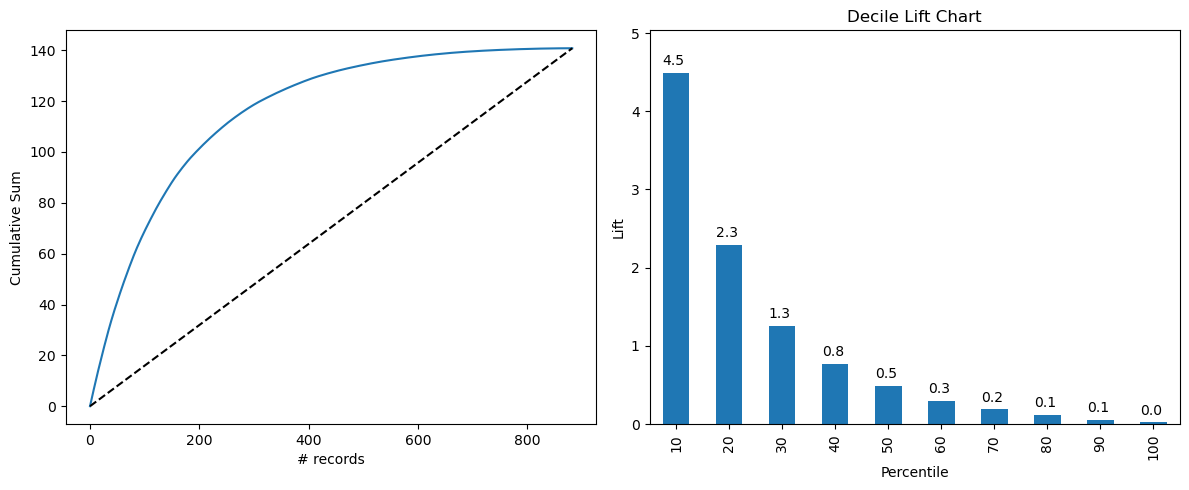

Lift based on meanResponse: 4.495027898327491
Expected cumulative price for 10% random sales: 14.080109195910271
Cumulative price for top 10% sales: 63.374456494110625
Lift calculated based on gains chart: 4.500991832685393


In [107]:
# Predictions for the validation set (using probabilities for Gains/Lift Charts)
pred_v = pd.Series(reg.predict_proba(valid_X)[:, 1], index=valid_X.index)
pred_v = pred_v.sort_values(ascending=False)

# Print for Verification
print(pred_v.head())

# Gains Chart and Lift Chart
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Gains Chart
ax = gainsChart(pred_v, ax=axes[0])
ax.set_ylabel("Cumulative Sum")

# Lift Chart
ax = liftChart(pred_v, ax=axes[1])

plt.tight_layout()
plt.show()

# Calculate Lift for Top 10%
groups = [int(10 * i / len(pred_v)) for i in range(len(pred_v))]
meanPercentile = pred_v.groupby(groups).mean()
meanResponse = meanPercentile / pred_v.mean()

meanResponse.index = (meanResponse.index + 1) * 10
lift_top10 = meanResponse[10]

# Expected cumulative price for random 10%
random10 = pred_v.cumsum().iloc[-1] / 10

# Cumulative price for top 10%
cumPred10 = pred_v.cumsum().iloc[int(len(pred_v) * 0.1) - 1]

# Lift Calculation
lift_gain = cumPred10 / random10

print("Lift based on meanResponse:", lift_top10)
print("Expected cumulative price for 10% random sales:", random10)
print("Cumulative price for top 10% sales:", cumPred10)
print("Lift calculated based on gains chart:", lift_gain)


In [109]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score

# Classification Summary
# Generate predictions at a cutoff threshold of 0.5
cutoff = 0.5
predicted = [1 if p > cutoff else 0 for p in reg.predict_proba(valid_X)[:, 1]]

# Confusion Matrix
conf_matrix = confusion_matrix(valid_y, predicted)
print("Confusion Matrix:\n", conf_matrix)

# Accuracy vs Cutoff
cutoffs = [i * 0.1 for i in range(0, 11)]
accT = []
for c in cutoffs:
    predicted_cutoff = [1 if p > c else 0 for p in reg.predict_proba(valid_X)[:, 1]]
    accT.append(accuracy_score(valid_y, predicted_cutoff))


Confusion Matrix:
 [[726  29]
 [ 71  56]]


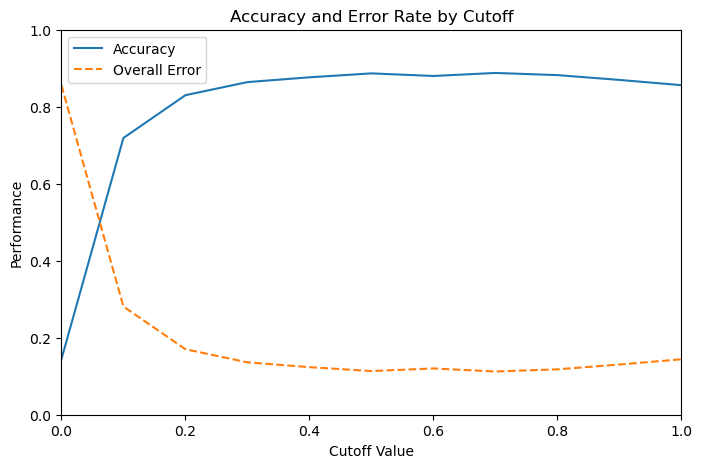

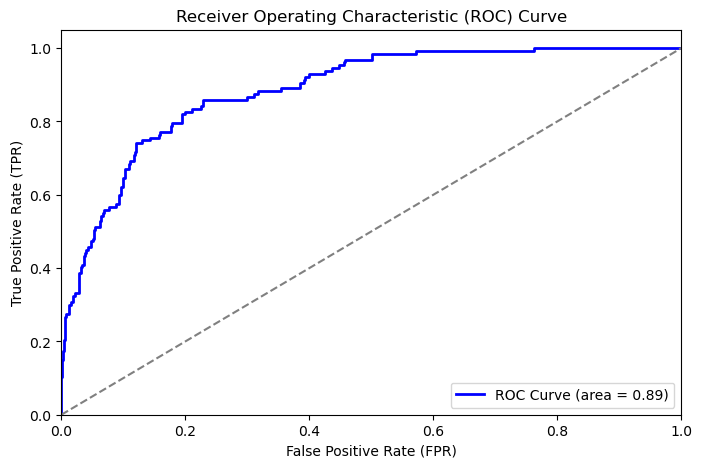

In [111]:
# Plot Accuracy vs Cutoff
plt.figure(figsize=(8, 5))
line_accuracy = plt.plot(cutoffs, accT, '-', label='Accuracy')[0]
line_error = plt.plot(cutoffs, [1 - acc for acc in accT], '--', label='Overall Error')[0]
plt.xlim([0, 1.0])
plt.ylim([0, 1])
plt.xlabel('Cutoff Value')
plt.ylabel('Performance')
plt.title('Accuracy and Error Rate by Cutoff')
plt.legend(handles=[line_accuracy, line_error])
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(valid_y, reg.predict_proba(valid_X)[:, 1])
roc_auc = roc_auc_score(valid_y, reg.predict_proba(valid_X)[:, 1])

# Plot ROC Curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random Guess Line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

PLACE

In [114]:
#Define Predictors and Target
predictors_combined = [
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth', 'Children', 'Higher_Ed', 'In_Relationship'
]
target = 'Total_Spent'

# Prepare data
X_combined = customer_df[predictors_combined]
y_combined = customer_df[target]

# Train-Test Split
train_X, valid_X, train_y, valid_y = train_test_split(X_combined, y_combined, test_size=0.4, random_state=42)

# Step 4: Train Linear Regression
print("Training Linear Regression")
linear_model = LinearRegression()
linear_model.fit(train_X, train_y)

# Predictions
train_pred_lr = linear_model.predict(train_X)
valid_pred_lr = linear_model.predict(valid_X)


Training Linear Regression


In [116]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np  # you can also use: from math import sqrt

# Model Evaluation for Linear Regression
train_rmse_lr = np.sqrt(mean_squared_error(train_y, train_pred_lr))
valid_rmse_lr = np.sqrt(mean_squared_error(valid_y, valid_pred_lr))
r2_lr = r2_score(valid_y, valid_pred_lr)

print("\nLinear Regression Performance:")
print(f"Training RMSE: {train_rmse_lr:.2f}, Validation RMSE: {valid_rmse_lr:.2f}, Validation R²: {r2_lr:.2f}")



Linear Regression Performance:
Training RMSE: 280.16, Validation RMSE: 287.28, Validation R²: 0.75


In [118]:
# Lasso Regression with Cross-Validation
print("\nStep 5: Training Lasso Regression with Cross-Validation")
lasso_cv = LassoCV(cv=5, alphas=np.logspace(-4, 1, 50), random_state=42)
lasso_cv.fit(train_X, train_y)


Step 5: Training Lasso Regression with Cross-Validation


LassoCV(alphas=array([1.00000000e-04, 1.26485522e-04, 1.59985872e-04, 2.02358965e-04,
       2.55954792e-04, 3.23745754e-04, 4.09491506e-04, 5.17947468e-04,
       6.55128557e-04, 8.28642773e-04, 1.04811313e-03, 1.32571137e-03,
       1.67683294e-03, 2.12095089e-03, 2.68269580e-03, 3.39322177e-03,
       4.29193426e-03, 5.42867544e-03, 6.86648845e-03, 8.68511374e-03,
       1.09854114e-02, 1.38949549e-0...
       7.19685673e-02, 9.10298178e-02, 1.15139540e-01, 1.45634848e-01,
       1.84206997e-01, 2.32995181e-01, 2.94705170e-01, 3.72759372e-01,
       4.71486636e-01, 5.96362332e-01, 7.54312006e-01, 9.54095476e-01,
       1.20679264e+00, 1.52641797e+00, 1.93069773e+00, 2.44205309e+00,
       3.08884360e+00, 3.90693994e+00, 4.94171336e+00, 6.25055193e+00,
       7.90604321e+00, 1.00000000e+01]),
        cv=5, random_state=42)

In [120]:
import numpy as np  # Make sure this is at the top of your notebook

# Predictions
lasso_pred_valid = lasso_cv.predict(valid_X)
r2_lasso = r2_score(valid_y, lasso_pred_valid)
rmse_lasso = np.sqrt(mean_squared_error(valid_y, lasso_pred_valid))  # 👈 fixed

print("\nLasso Regression Performance:")
print(f"Validation RMSE: {rmse_lasso:.2f}, Validation R²: {r2_lasso:.2f}")
print(f"Best Alpha for Lasso: {lasso_cv.alpha_:.4f}")

# Feature Importance for Lasso
lasso_coefficients = pd.DataFrame({
    'Feature': predictors_combined,
    'Coefficient': lasso_cv.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nLasso Regression Coefficients:")
print(lasso_coefficients)

# Final Comparison
comparison_results = pd.DataFrame({
    "Model": ["Linear Regression", "Lasso Regression"],
    "Validation R²": [r2_lr, r2_lasso],
    "Validation RMSE": [valid_rmse_lr, rmse_lasso],
    "Best Alpha (Lasso)": ["N/A", lasso_cv.alpha_]
})

print("\nFinal Model Comparison:")
print(comparison_results)



Lasso Regression Performance:
Validation RMSE: 287.31, Validation R²: 0.75
Best Alpha for Lasso: 1.9307

Lasso Regression Coefficients:
               Feature  Coefficient
1  NumCatalogPurchases       93.513
2    NumStorePurchases       49.961
0      NumWebPurchases       34.745
5            Higher_Ed        0.000
6      In_Relationship       -0.000
3    NumWebVisitsMonth      -10.568
4             Children     -245.228

Final Model Comparison:
               Model  Validation R²  Validation RMSE Best Alpha (Lasso)
0  Linear Regression          0.747          287.279                N/A
1   Lasso Regression          0.747          287.315              1.931


**Final Recommendations & Model Insights:**

The Lasso Regression model not only suggested strong predictors, but it provided a scoring function to quantify the probability of each customer responding to a campaign. This offers rank-based targeting rather than demographic assumptions.

Key predictors weren't always obvious (like income). The model uncovered that prior campaign activity and category-level spend behaviour are behaviorally associated measures of campaign performance. Already engaged customers taking advantage of promotions and spending in indulgent/lifestyle categories (wine, meat, gold, for instance) exhibit greater responsiveness, likely due to accumulated buying momentum and sensitivity to marketing. 

Segment Strategy
Segregating customers by those same variables, we found distinct segments that are functional:

- Cluster 2: High-spending purchasers with strong campaign history. They can support premium product drops, bundle promotions, and early access deals. They should be the key cluster for high-ROI campaigns.

- Cluster 1: Mid-spenders with varied responsiveness. They likely require price-sensitive, limited-time promotions. They can be reached by reactivation and cross-sell campaigns but at low marginal CAC only.

- Cluster 0 & 3: Cold or inconsistent buyers. In this case, marketing activity would be redirected from acquisition to passive engagement (e.g., newsletters, organic content), or deprioritized altogether in the interest of budget conservation.

**Recommended Marketing Actions:**

- Use response scores from the model to automatically build tiered campaign audiences: high-potential (score > 0.7), test-and-learn (0.4–0.7), passive only (< 0.4).

- Replace uniform campaign strategies with segment-specific content

- Cluster 2 gets loyalty rewards, premium cross-sells

- Cluster 1 gets deal-laden packages or reminders

- Cluster 0 gets low-impact or automated-only messaging

Bond each customer's predicted probability into budget assignment logic (e.g $X per customer per predicted 10% lift in response).